# ASP3231 Project 
### Panchami and Monica

The object we observed for our project was NCG 2808

This Jupyter notebook contains our bias, dark and flat images and subtractions

## Bias, Dark and Flat

In [1]:
# Importing appropriate libraries
import numpy as np
import astropy
import ccdproc
from ccdproc import CCDData, combiner
from astropy import units as u
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm
import gc                                 
gc.enable()

## <font color=purple> Bias images

_We have four bias images at zero second exposures to process_

In [3]:
# Read in the bias images for processing
images = ccdproc.ImageFileCollection(".")

In [4]:
# Filter and list the bias images
biases = [ CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 2) ]
print(len(biases), ' bias images loaded')
for fn in images.files_filtered( PICTTYPE = 2 ):
    print(fn)

Set OBSGEO-Y to  2896022.315 from OBSGEO-[LBH].
Set OBSGEO-Z to -3889419.901 from OBSGEO-[LBH]'. [astropy.wcs.wcs]
Set OBSGEO-Y to  2896022.315 from OBSGEO-[LBH].
Set OBSGEO-Z to -3889419.901 from OBSGEO-[LBH]'.


4  bias images loaded
Bias_00002569.fits
Bias_00002570.fits
Bias_00002571.fits
Bias_00002572.fits


In [5]:
# We should print some example pixel values as well as the statistics
# (so that we can ensure everything is running smoothly and as expectes after we complete bias median)
print(biases[0])
print('Min:', np.min(biases[0]))
print('Max:', np.max(biases[0]))
print('Mean:', np.mean(biases[0]))
print('Std:', np.std(biases[0]))


[[2073 2120 2057 ... 2118 2107 2152]
 [2187 2131 2113 ... 2142 2142 2117]
 [2198 2154 2118 ... 2082 2164 2159]
 ...
 [2197 2217 2137 ... 2197 2110 2130]
 [2150 2213 2170 ... 2127 2168 2166]
 [2211 2191 2163 ... 2112 2158 2149]]
Min: 1945
Max: 2274
Mean: 2088.2256752395206
Std: 33.1356946142231


<font color=blue> _We can see here that the mean pixel value is 2088_

In [6]:
# Combine images together using median combine and print the image statistics for comparison
bias_median = ccdproc.Combiner(biases, dtype=np.float32).median_combine()
print('Image statistics for the median bias')
thisimage=bias_median
print('Min:', np.min(thisimage))
print('Max:', np.max(thisimage))
print('Median:', np.median(thisimage))
print('Std Dev:', np.std(thisimage))

Image statistics for the median bias
Min: 1996.5
Max: 2217.5
Median: 2085.5
Std Dev: 21.45785903930664


/Users/monica/opt/anaconda3/envs/obsastro2020/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [7]:
# Write the bias median to an output FITS flie and remove the others from the notebook
bias_median.write("bias_median_project.fits")

In [8]:
del(biases)
collected = gc.collect()
print('Check garbage collection', collected)

Check garbage collection 420


## <font color=purple> Dark images


In [9]:
# Filter and define the dark images and print the statistics for the first image
images = ccdproc.ImageFileCollection(".",glob_include = 'Dark_5*')
for fn in images.files_filtered(PICTTYPE = 3):
    print(fn)
darks = [ CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 3) ]


Dark_5.000secs00002819.fits
Dark_5.000secs00002820.fits
Dark_5.000secs00002821.fits
Dark_5.000secs00002822.fits
Dark_5.000secs00002823.fits
Dark_5.000secs00002824.fits


In [11]:
print('Statistics for first dark image')
print('Min:', np.min(darks[0]))
print('Max:', np.max(darks[0]))
print('Mean:', np.mean(darks[0]))
print('Std:', np.std(darks[0]))

Statistics for first dark image
Min: 1918
Max: 8141
Mean: 2085.0404994822475
Std: 34.34004881817512


In [12]:
# Subtracting the bias from the dark DO NOT RUN AGAIN
for idx, thisimage in enumerate(darks): 
    darks[idx] = ccdproc.subtract_bias(thisimage, bias_median)

In [13]:
# Combine processed dark images together using median combine and print statistics
dark_median = ccdproc.Combiner(darks, dtype=np.float32).median_combine()

# Printing stats
print('Min:', np.min(dark_median[0]))
print('Max:', np.max(dark_median[0]))
print('Mean:', np.mean(dark_median[0]))
print('Std:', np.std(dark_median[0]))

Min: -75.5
Max: 140.5
Mean: 3.147324
Std: 28.959247589111328


<font color=blue> _Low counts are to be expected as the images were taken with shutter on_

In [14]:
# Add keywords for the header
print(dark_median.header)
dark_median.meta.update(EXPTIME = 5)
dark_median.meta.update(TELESCOP = 'C11')
dark_median.meta.update(OBJECT = 'Dark_Median')

OrderedDict([('NCOMBINE', 6)])


In [15]:
# Writing the dark median combine to an output file 
dark_median.write("darkmedian.fits")

# Remove individuals from notebook
del(darks)
collected = gc.collect()
print('Check garbage collection', collected)

Check garbage collection 640


## <font color=purple> Flat images

<font color=blue> _Each filter will have its own flat images, so we need to do this for I, V and R_

### <font color=RED> V band flats

In [28]:
# Filter the V band images
images = ccdproc.ImageFileCollection(".",glob_include = 'Flat_V_*')
for fn in images.files_filtered(PICTTYPE = 4):
    print(fn)
flats = [ CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 4) ]

Flat_V_1.000secs00002618.fits
Flat_V_1.000secs00002619.fits
Flat_V_1.000secs00002620.fits
Flat_V_1.000secs00002621.fits
Flat_V_1.000secs00002622.fits
Flat_V_1.000secs00002623.fits
Flat_V_1.000secs00002624.fits
Flat_V_1.000secs00002625.fits
Flat_V_1.000secs00002626.fits
Flat_V_1.000secs00002627.fits
Flat_V_1.000secs00002628.fits
Flat_V_1.000secs00002629.fits
Flat_V_1.000secs00002630.fits
Flat_V_1.000secs00002631.fits
Flat_V_1.000secs00002632.fits
Flat_V_1.000secs00002633.fits
Flat_V_1.000secs00002634.fits
Flat_V_1.000secs00002635.fits
Flat_V_1.000secs00002636.fits
Flat_V_1.000secs00002637.fits
Flat_V_1.000secs00002678.fits
Flat_V_1.000secs00002679.fits
Flat_V_1.000secs00002680.fits
Flat_V_1.000secs00002681.fits
Flat_V_1.000secs00002682.fits
Flat_V_1.000secs00002683.fits
Flat_V_1.000secs00002684.fits
Flat_V_1.000secs00002685.fits
Flat_V_1.000secs00002686.fits
Flat_V_1.000secs00002687.fits
Flat_V_1.000secs00002688.fits
Flat_V_1.000secs00002689.fits
Flat_V_1.000secs00002690.fits
Flat_V_1.0

Min: 8348
Max: 13125
Mean: 11624.241412897512
Std: 185.92191062611423


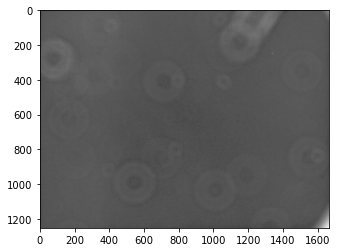

In [29]:
# Print the first V band flat 
plt.imshow(flats[0], cmap='Greys', norm=LogNorm())

# Print statistics for it
print('Min:', np.min(flats[0]))
print('Max:', np.max(flats[0]))
print('Mean:', np.mean(flats[0]))
print('Std:', np.std(flats[0]))

In [30]:
# Process V band flat images with bias
for idx, thisimage in enumerate(flats): 
    flats[idx] = ccdproc.subtract_bias(thisimage, bias_median)

# Subtract dark image from V flat
for idx, thisimage in enumerate(flats): 
    flats[idx] = ccdproc.subtract_dark(thisimage, dark_median, exposure_time = 'EXPTIME',
                                       exposure_unit = u.second, scale = True)

In [31]:
# Print the mean vlaues
for thisimage in flats:
    print('Median:', np.ma.median(thisimage.data)) 

Median: 9545.39999999851
Median: 9446.599999904633
Median: 9349.0
Median: 9250.399999976158
Median: 9151.200000047684
Median: 9053.799999952316
Median: 8958.099999904633
Median: 8862.400000095367
Median: 8767.399999976158
Median: 8675.799999952316
Median: 8580.800000011921
Median: 8490.299999713898
Median: 8400.5
Median: 8311.599999964237
Median: 8223.299999713898
Median: 8136.700000047684
Median: 8049.800000190735
Median: 7962.099999904633
Median: 7877.5
Median: 7791.900000095367
Median: 3161.4000000953674
Median: 3129.5
Median: 3096.300000190735
Median: 3063.7999999523163
Median: 3031.0
Median: 2999.600000143051
Median: 2968.2000000476837
Median: 2937.9000000953674
Median: 2909.0
Median: 2877.7000000476837
Median: 2848.199999988079
Median: 2819.5
Median: 2788.899999856949
Median: 2760.9000000953674
Median: 2733.1999999284744
Median: 2706.199999988079
Median: 2676.600000143051
Median: 2648.5
Median: 2621.0999999046326
Median: 2594.2999999523163
Median: 7439.800000011921
Median: 7306.5

In [32]:
# Make normalised copies of the flat field images, and combine them together
tempimages = flats.copy()
for idx, thisimage in enumerate(tempimages):
    m = 1.0 / np.ma.median(tempimages[idx])
    tempimages[idx] = tempimages[idx].multiply(m * u.adu)
FlatV_median = ccdproc.Combiner(tempimages, dtype=np.float32).median_combine()

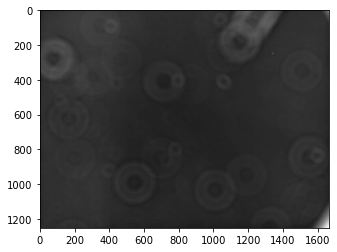

In [33]:
# Print the processed V band flat
plt.imshow(FlatV_median, cmap='Greys', norm=LogNorm())

In [35]:
print(FlatV_median.header)
FlatV_median.meta.update(EXPTIME = 3)
FlatV_median.meta.update(TELESCOP = 'C11')
FlatV_median.meta.update(OBJECT = 'FlatV_Median')

OrderedDict([('NCOMBINE', 80), ('EXPTIME', 3), ('TELESCOP', 'C11'), ('OBJECT', 'FlatV_Median')])


In [36]:
# Write the image to output file
FlatV_median.write("FlatV_median.fits")

In [37]:
del(flats)
del(tempimages)
collected = gc.collect()
print('Check garbage collection', collected)

Check garbage collection 3314


### <font color=purple> I band flats

In [39]:
images = ccdproc.ImageFileCollection(".",glob_include = 'Flat_I_*')
for fn in images.files_filtered(PICTTYPE = 4):
    print(fn)
flats = [ CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 4) ]

Flat_I_5.000secs00002778.fits
Flat_I_5.000secs00002779.fits
Flat_I_5.000secs00002780.fits
Flat_I_5.000secs00002781.fits
Flat_I_5.000secs00002782.fits
Flat_I_5.000secs00002783.fits
Flat_I_5.000secs00002784.fits
Flat_I_5.000secs00002785.fits
Flat_I_5.000secs00002786.fits
Flat_I_5.000secs00002787.fits
Flat_I_5.000secs00002788.fits
Flat_I_5.000secs00002789.fits
Flat_I_5.000secs00002790.fits
Flat_I_5.000secs00002791.fits
Flat_I_5.000secs00002792.fits
Flat_I_5.000secs00002793.fits
Flat_I_5.000secs00002794.fits
Flat_I_5.000secs00002795.fits
Flat_I_5.000secs00002796.fits
Flat_I_5.000secs00002797.fits


In [41]:
# Process I band flat images with bias
for idx, thisimage in enumerate(flats): 
    flats[idx] = ccdproc.subtract_bias(thisimage, bias_median)

# Subtract dark image from I band flat
for idx, thisimage in enumerate(flats): 
    flats[idx] = ccdproc.subtract_dark(thisimage, dark_median, exposure_time = 'EXPTIME',
                                       exposure_unit = u.second, scale = True)

In [42]:
# Print the median vlaues
for thisimage in flats:
    print('Median:', np.ma.median(thisimage.data)) 

Median: 1076.5
Median: 1054.0
Median: 1029.5
Median: 1005.0
Median: 982.0
Median: 957.5
Median: 935.0
Median: 913.5
Median: 891.5
Median: 869.5
Median: 849.5
Median: 828.0
Median: 808.0
Median: 789.5
Median: 770.0
Median: 752.5
Median: 735.5
Median: 717.5
Median: 701.5
Median: 685.0


In [43]:
# Make normalised copies of the flat field images, and combine them together
tempimages = flats.copy()
for idx, thisimage in enumerate(tempimages):
    m = 1.0 / np.ma.median(tempimages[idx])
    tempimages[idx] = tempimages[idx].multiply(m * u.adu)
FlatI_median = ccdproc.Combiner(tempimages, dtype=np.float32).median_combine()

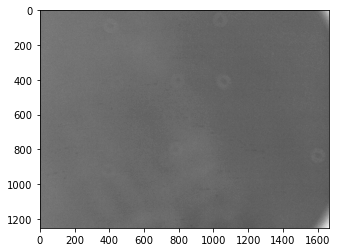

In [44]:
# Print the processed I band flat
plt.imshow(FlatI_median, cmap='Greys', norm=LogNorm())

In [45]:
# Write the image to output file -- correcting for mislabelled file 
FlatV_median.write("FlatI_median.fits")

In [46]:
del(flats)
del(tempimages)
collected = gc.collect()
print('Check garbage collection', collected)

Check garbage collection 120


### <font color=purple> R band flats

In [47]:
images = ccdproc.ImageFileCollection(".",glob_include = 'Flat_R_*')
for fn in images.files_filtered(PICTTYPE = 4):
    print(fn)
flats = [ CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 4) ]

Flat_R_3.000secs00002738.fits
Flat_R_3.000secs00002739.fits
Flat_R_3.000secs00002740.fits
Flat_R_3.000secs00002741.fits
Flat_R_3.000secs00002742.fits
Flat_R_3.000secs00002743.fits
Flat_R_3.000secs00002744.fits
Flat_R_3.000secs00002745.fits
Flat_R_3.000secs00002746.fits
Flat_R_3.000secs00002747.fits
Flat_R_3.000secs00002748.fits
Flat_R_3.000secs00002749.fits
Flat_R_3.000secs00002750.fits
Flat_R_3.000secs00002751.fits
Flat_R_3.000secs00002752.fits
Flat_R_3.000secs00002753.fits
Flat_R_3.000secs00002754.fits
Flat_R_3.000secs00002755.fits
Flat_R_3.000secs00002756.fits
Flat_R_3.000secs00002757.fits
Flat_R_5.000secs00002758.fits
Flat_R_5.000secs00002759.fits
Flat_R_5.000secs00002760.fits
Flat_R_5.000secs00002761.fits
Flat_R_5.000secs00002762.fits
Flat_R_5.000secs00002763.fits
Flat_R_5.000secs00002764.fits
Flat_R_5.000secs00002765.fits
Flat_R_5.000secs00002766.fits
Flat_R_5.000secs00002767.fits
Flat_R_5.000secs00002768.fits
Flat_R_5.000secs00002769.fits
Flat_R_5.000secs00002770.fits
Flat_R_5.0

In [48]:
# Process R band flat images with bias
for idx, thisimage in enumerate(flats): 
    flats[idx] = ccdproc.subtract_bias(thisimage, bias_median)

# Subtract dark image from R band flat
for idx, thisimage in enumerate(flats): 
    flats[idx] = ccdproc.subtract_dark(thisimage, dark_median, exposure_time = 'EXPTIME',
                                       exposure_unit = u.second, scale = True)

In [49]:
# Print the median vlaues
for thisimage in flats:
    print('Median:', np.ma.median(thisimage.data)) 

Median: 2286.8000000715256
Median: 2246.800000011921
Median: 2207.7999992370605
Median: 2168.7000007629395
Median: 2130.8999996185303
Median: 2093.7000007629395
Median: 2057.0
Median: 2017.8999996185303
Median: 1981.1000001430511
Median: 1944.8000001907349
Median: 1910.8000001907349
Median: 1877.3000001907349
Median: 1844.6999998092651
Median: 1812.9000000953674
Median: 1782.1000003814697
Median: 1751.7000007629395
Median: 1720.7999992370605
Median: 1691.0
Median: 1661.5
Median: 1633.5
Median: 1993.0
Median: 1946.0
Median: 1900.5
Median: 1855.0
Median: 1812.0
Median: 1770.0
Median: 1730.5
Median: 1689.0
Median: 1651.5
Median: 1615.0
Median: 1578.0
Median: 1543.0
Median: 1507.5
Median: 1475.5
Median: 1442.5
Median: 1410.5
Median: 1379.5
Median: 1349.5
Median: 1320.5
Median: 1292.0


In [50]:
# Make normalised copies of the flat field images, and combine them together
tempimages = flats.copy()
for idx, thisimage in enumerate(tempimages):
    m = 1.0 / np.ma.median(tempimages[idx])
    tempimages[idx] = tempimages[idx].multiply(m * u.adu)
FlatR_median = ccdproc.Combiner(tempimages, dtype=np.float32).median_combine()

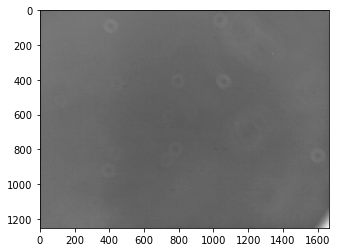

In [51]:
# Print the processed R band flat
plt.imshow(FlatR_median, cmap='Greys', norm=LogNorm())

In [52]:
# Write the image to output file
FlatR_median.write("FlatR_median.fits")

In [53]:
del(flats)
del(tempimages)
collected = gc.collect()
print('Check garbage collection', collected)

Check garbage collection 196


## <font color=blue> Now we can process the science images using these flat, bias, and dark medians

### <font color=purple> V band

In [54]:
# Load the V band science images
images = ccdproc.ImageFileCollection(".",glob_include = '*_V_*')
for fn in images.files_filtered(PICTTYPE = 1):
    print(fn)
scim = [CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 1)]


NGC_2808_V_00002817.fits
NGC_2808_V_00002829.fits
NGC_2808_V_00002830.fits
NGC_2808_V_00002831.fits
NGC_2808_V_00002848.fits
NGC_2808_V_00002849.fits
NGC_2808_V_00002850.fits
NGC_2808_V_00002851.fits
NGC_2808_V_00002852.fits
NGC_2808_V_00002853.fits
NGC_2808_V_00002854.fits
NGC_2808_V_00002855.fits
NGC_2808_V_00002856.fits
NGC_2808_V_00002857.fits
NGC_2808_V_00002868.fits
NGC_2808_V_00002869.fits
NGC_2808_V_00002870.fits
NGC_2808_V_00002871.fits
NGC_2808_V_00002872.fits
NGC_2808_V_00002873.fits
NGC_2808_V_00002874.fits
NGC_2808_V_00002875.fits
NGC_2808_V_00002876.fits
NGC_2808_V_00002877.fits
NGC_2808_V_00002898.fits
NGC_2808_V_00002899.fits
NGC_2808_V_00002900.fits
NGC_2808_V_00002901.fits
NGC_2808_V_00002902.fits
NGC_2808_V_00002903.fits
NGC_2808_V_00002904.fits
NGC_2808_V_00002905.fits
NGC_2808_V_00002906.fits
NGC_2808_V_00002907.fits


In [55]:
# process the images using the bias, dark and flat combines created earlier
# here we subtract bias, subtract dark, and flat from the V band science images
# DO NOT RUN AGAIN!
print(scim[0][:,0])

for idx, thisimage in enumerate(scim): 
    scim[idx] = ccdproc.subtract_bias(thisimage, bias_median)
print(scim[0][:,0])

for idx, thisimage in enumerate(scim): 
    scim[idx] = ccdproc.subtract_dark(thisimage, dark_median, exposure_time = 'EXPTIME', 
                                      exposure_unit = u.second, scale = True)
print(scim[0][:,0])

for idx, thisimage in enumerate(scim): 
    scim[idx] = ccdproc.flat_correct(thisimage, FlatV_median)
print(scim[0][:,0])


# printing the first column of the first image allows us to check that the counts are changing as expected

[2315 2346 2264 ... 2243 2269 2152]
[225.5 184.   80.  ...  58.5 127.5  -8. ]
[ 93.5  90.5  39.5 ...  81.  105.5 -15. ]
[ 91.54356722  89.75512285  39.52775884 ...  79.9169034  103.97845233
 -14.80145816]


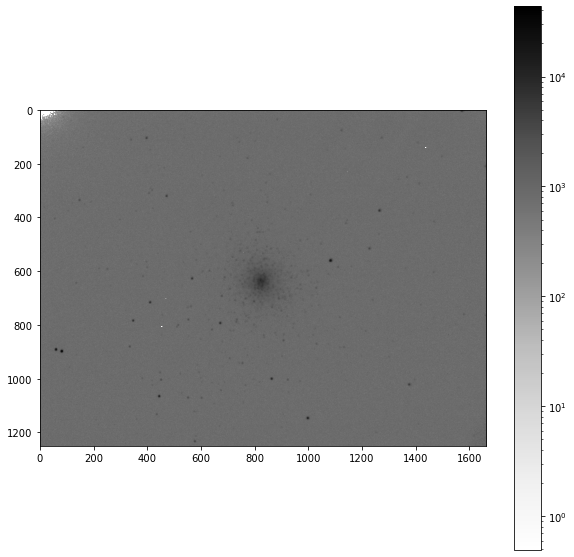

In [57]:
#Print a processed V band image
fig, ax = plt.subplots(figsize = (10,10))
plt.imshow(scim[5], cmap='Greys', norm = LogNorm())
plt.colorbar()

In [58]:
# save processed images 
newname = []
for fn in images.files_filtered(PICTTYPE = 1):
    newname.extend(["proc_" + fn ])
    
print(newname)
for idx, thisimage in enumerate(scim):
    tempimages = [thisimage]
    temp = ccdproc.Combiner(tempimages,dtype=np.float32).median_combine() 
    temp.meta = thisimage.meta
    temp.write(newname[idx])

['proc_NGC_2808_V_00002817.fits', 'proc_NGC_2808_V_00002829.fits', 'proc_NGC_2808_V_00002830.fits', 'proc_NGC_2808_V_00002831.fits', 'proc_NGC_2808_V_00002848.fits', 'proc_NGC_2808_V_00002849.fits', 'proc_NGC_2808_V_00002850.fits', 'proc_NGC_2808_V_00002851.fits', 'proc_NGC_2808_V_00002852.fits', 'proc_NGC_2808_V_00002853.fits', 'proc_NGC_2808_V_00002854.fits', 'proc_NGC_2808_V_00002855.fits', 'proc_NGC_2808_V_00002856.fits', 'proc_NGC_2808_V_00002857.fits', 'proc_NGC_2808_V_00002868.fits', 'proc_NGC_2808_V_00002869.fits', 'proc_NGC_2808_V_00002870.fits', 'proc_NGC_2808_V_00002871.fits', 'proc_NGC_2808_V_00002872.fits', 'proc_NGC_2808_V_00002873.fits', 'proc_NGC_2808_V_00002874.fits', 'proc_NGC_2808_V_00002875.fits', 'proc_NGC_2808_V_00002876.fits', 'proc_NGC_2808_V_00002877.fits', 'proc_NGC_2808_V_00002898.fits', 'proc_NGC_2808_V_00002899.fits', 'proc_NGC_2808_V_00002900.fits', 'proc_NGC_2808_V_00002901.fits', 'proc_NGC_2808_V_00002902.fits', 'proc_NGC_2808_V_00002903.fits', 'proc_NGC

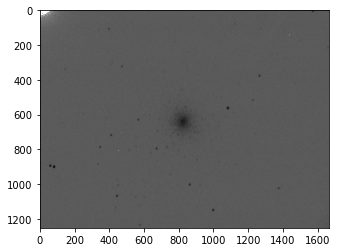

In [60]:
plt.imshow(temp, cmap='Greys', norm=LogNorm())

### <font color=purple> R band

In [61]:
# Load the R band science images
images = ccdproc.ImageFileCollection(".",glob_include = '*_R_*')
for fn in images.files_filtered(PICTTYPE = 1):
    print(fn)
scim = [CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 1)]

NGC_2808_R_00002815.fits
NGC_2808_R_00002816.fits
NGC_2808_R_00002832.fits
NGC_2808_R_00002833.fits
NGC_2808_R_00002834.fits
NGC_2808_R_00002858.fits
NGC_2808_R_00002859.fits
NGC_2808_R_00002860.fits
NGC_2808_R_00002861.fits
NGC_2808_R_00002862.fits
NGC_2808_R_00002863.fits
NGC_2808_R_00002864.fits
NGC_2808_R_00002865.fits
NGC_2808_R_00002866.fits
NGC_2808_R_00002867.fits
NGC_2808_R_00002888.fits
NGC_2808_R_00002889.fits
NGC_2808_R_00002890.fits
NGC_2808_R_00002891.fits
NGC_2808_R_00002892.fits
NGC_2808_R_00002893.fits
NGC_2808_R_00002894.fits
NGC_2808_R_00002895.fits
NGC_2808_R_00002896.fits
NGC_2808_R_00002897.fits


In [62]:
# Process R band images with the bias, dark and flat images
print(scim[0][:,0])

for idx, thisimage in enumerate(scim): 
    scim[idx] = ccdproc.subtract_bias(thisimage, bias_median)
print(scim[0][:,0])

for idx, thisimage in enumerate(scim): 
    scim[idx] = ccdproc.subtract_dark(thisimage, dark_median, exposure_time ='EXPTIME', 
                                      exposure_unit = u.second, scale = True)
print(scim[0][:,0])

for idx, thisimage in enumerate(scim): 
    scim[idx] = ccdproc.flat_correct(thisimage, FlatR_median)
print(scim[0][:,0])

[2222 2228 2275 ... 2216 2207 2223]
[132.5  66.   91.  ...  31.5  65.5  63. ]
[53.29999542  9.89999771 66.69999886 ... 45.00000095 52.29999924
 58.79999971]
[53.14304854  9.93993884 67.09732653 ... 45.7394398  52.77456471
 59.84365651]


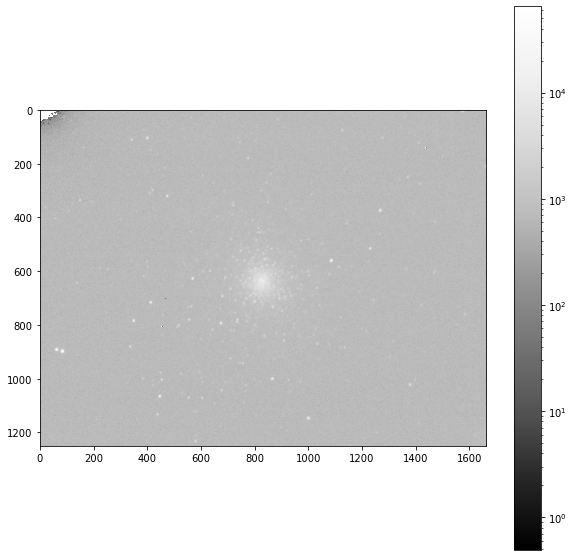

In [63]:
#Print a processed R band image
fig, ax = plt.subplots(figsize = (10,10))
plt.imshow(scim[6], cmap='Greys_r', norm = LogNorm())
plt.colorbar()

In [64]:
# save processed images 
newname = []
for fn in images.files_filtered(PICTTYPE = 1):
    newname.extend(["proc_" + fn ])
    
print(newname)
for idx, thisimage in enumerate(scim):
    tempimages = [thisimage]
    temp = ccdproc.Combiner(tempimages,dtype=np.float32).median_combine() 
    temp.meta = thisimage.meta
    temp.write(newname[idx])

['proc_NGC_2808_R_00002815.fits', 'proc_NGC_2808_R_00002816.fits', 'proc_NGC_2808_R_00002832.fits', 'proc_NGC_2808_R_00002833.fits', 'proc_NGC_2808_R_00002834.fits', 'proc_NGC_2808_R_00002858.fits', 'proc_NGC_2808_R_00002859.fits', 'proc_NGC_2808_R_00002860.fits', 'proc_NGC_2808_R_00002861.fits', 'proc_NGC_2808_R_00002862.fits', 'proc_NGC_2808_R_00002863.fits', 'proc_NGC_2808_R_00002864.fits', 'proc_NGC_2808_R_00002865.fits', 'proc_NGC_2808_R_00002866.fits', 'proc_NGC_2808_R_00002867.fits', 'proc_NGC_2808_R_00002888.fits', 'proc_NGC_2808_R_00002889.fits', 'proc_NGC_2808_R_00002890.fits', 'proc_NGC_2808_R_00002891.fits', 'proc_NGC_2808_R_00002892.fits', 'proc_NGC_2808_R_00002893.fits', 'proc_NGC_2808_R_00002894.fits', 'proc_NGC_2808_R_00002895.fits', 'proc_NGC_2808_R_00002896.fits', 'proc_NGC_2808_R_00002897.fits']


In [65]:

del(tempimages)
collected = gc.collect()
print('Check garbage collection', collected)

Check garbage collection 2446


### <font color=purple> I band

In [66]:
# Load the I band science images
images = ccdproc.ImageFileCollection(".",glob_include = '*_I_*')
for fn in images.files_filtered(PICTTYPE = 1):
    print(fn)
scim = [CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 1)]

NGC_2808_I_00002826.fits
NGC_2808_I_00002835.fits
NGC_2808_I_00002836.fits
NGC_2808_I_00002837.fits
NGC_2808_I_00002838.fits
NGC_2808_I_00002839.fits
NGC_2808_I_00002840.fits
NGC_2808_I_00002841.fits
NGC_2808_I_00002842.fits
NGC_2808_I_00002843.fits
NGC_2808_I_00002844.fits
NGC_2808_I_00002845.fits
NGC_2808_I_00002846.fits
NGC_2808_I_00002847.fits
NGC_2808_I_00002878.fits
NGC_2808_I_00002879.fits
NGC_2808_I_00002880.fits
NGC_2808_I_00002881.fits
NGC_2808_I_00002882.fits
NGC_2808_I_00002883.fits
NGC_2808_I_00002884.fits
NGC_2808_I_00002885.fits
NGC_2808_I_00002886.fits
NGC_2808_I_00002887.fits
NGC_2808_I_00002908.fits
NGC_2808_I_00002909.fits
NGC_2808_I_00002910.fits
NGC_2808_I_00002911.fits
NGC_2808_I_00002912.fits
NGC_2808_I_00002913.fits
NGC_2808_I_00002918.fits
NGC_2808_I_00002919.fits
NGC_2808_I_00002920.fits
NGC_2808_I_00002921.fits
NGC_2808_I_00002922.fits
NGC_2808_I_00002923.fits
NGC_2808_I_00002924.fits
NGC_2808_I_00002925.fits
NGC_2808_I_00002926.fits
NGC_2808_I_00002927.fits


In [67]:
# Process the I band images with the bias, dark and flats
print(scim[0][:,0])

for idx, thisimage in enumerate(scim): 
    scim[idx] = ccdproc.subtract_bias(thisimage, bias_median)
print(scim[0][:,0])

for idx, thisimage in enumerate(scim): 
    scim[idx] = ccdproc.subtract_dark(thisimage, dark_median, exposure_time ='EXPTIME', 
                                      exposure_unit = u.second, scale = True)
print(scim[0][:,0])

for idx, thisimage in enumerate(scim): 
    scim[idx] = ccdproc.flat_correct(thisimage, FlatR_median)
print(scim[0][:,0])

[2253 2293 2274 ... 2231 2179 2191]
[163.5 131.   90.  ...  46.5  37.5  31. ]
[31.5 37.5 49.5 ... 69.  15.5 24. ]
[31.40724527 37.6512922  49.79486837 ... 70.13380621 15.6406456
 24.42598237]


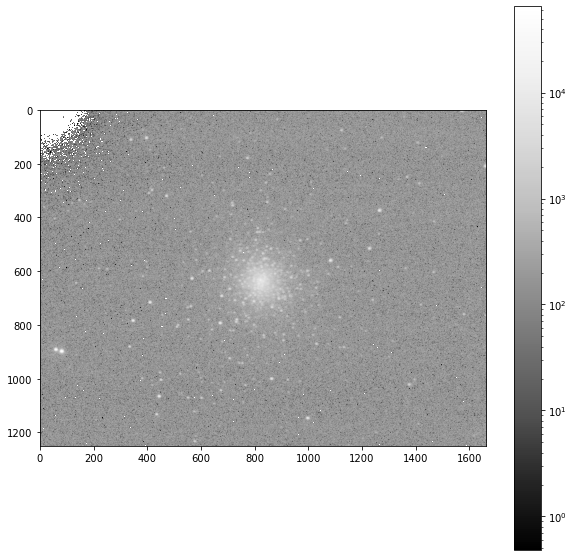

In [68]:
#Print a processed I band image
fig, ax = plt.subplots(figsize = (10,10))
plt.imshow(scim[7], cmap='Greys_r', norm = LogNorm())
plt.colorbar()

In [69]:
# save processed images 
newname = []
for fn in images.files_filtered(PICTTYPE = 1):
    newname.extend(["proc_" + fn ])
    
print(newname)
for idx, thisimage in enumerate(scim):
    tempimages = [thisimage]
    temp = ccdproc.Combiner(tempimages,dtype=np.float32).median_combine() 
    temp.meta = thisimage.meta
    temp.write(newname[idx])

['proc_NGC_2808_I_00002826.fits', 'proc_NGC_2808_I_00002835.fits', 'proc_NGC_2808_I_00002836.fits', 'proc_NGC_2808_I_00002837.fits', 'proc_NGC_2808_I_00002838.fits', 'proc_NGC_2808_I_00002839.fits', 'proc_NGC_2808_I_00002840.fits', 'proc_NGC_2808_I_00002841.fits', 'proc_NGC_2808_I_00002842.fits', 'proc_NGC_2808_I_00002843.fits', 'proc_NGC_2808_I_00002844.fits', 'proc_NGC_2808_I_00002845.fits', 'proc_NGC_2808_I_00002846.fits', 'proc_NGC_2808_I_00002847.fits', 'proc_NGC_2808_I_00002878.fits', 'proc_NGC_2808_I_00002879.fits', 'proc_NGC_2808_I_00002880.fits', 'proc_NGC_2808_I_00002881.fits', 'proc_NGC_2808_I_00002882.fits', 'proc_NGC_2808_I_00002883.fits', 'proc_NGC_2808_I_00002884.fits', 'proc_NGC_2808_I_00002885.fits', 'proc_NGC_2808_I_00002886.fits', 'proc_NGC_2808_I_00002887.fits', 'proc_NGC_2808_I_00002908.fits', 'proc_NGC_2808_I_00002909.fits', 'proc_NGC_2808_I_00002910.fits', 'proc_NGC_2808_I_00002911.fits', 'proc_NGC_2808_I_00002912.fits', 'proc_NGC_2808_I_00002913.fits', 'proc_NGC

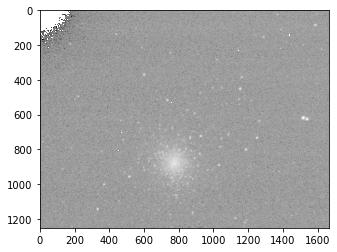

In [70]:
plt.imshow(temp, cmap='Greys_r', norm=LogNorm())

In [71]:

del(tempimages)
collected = gc.collect()
print('Check garbage collection', collected)

Check garbage collection 2080
